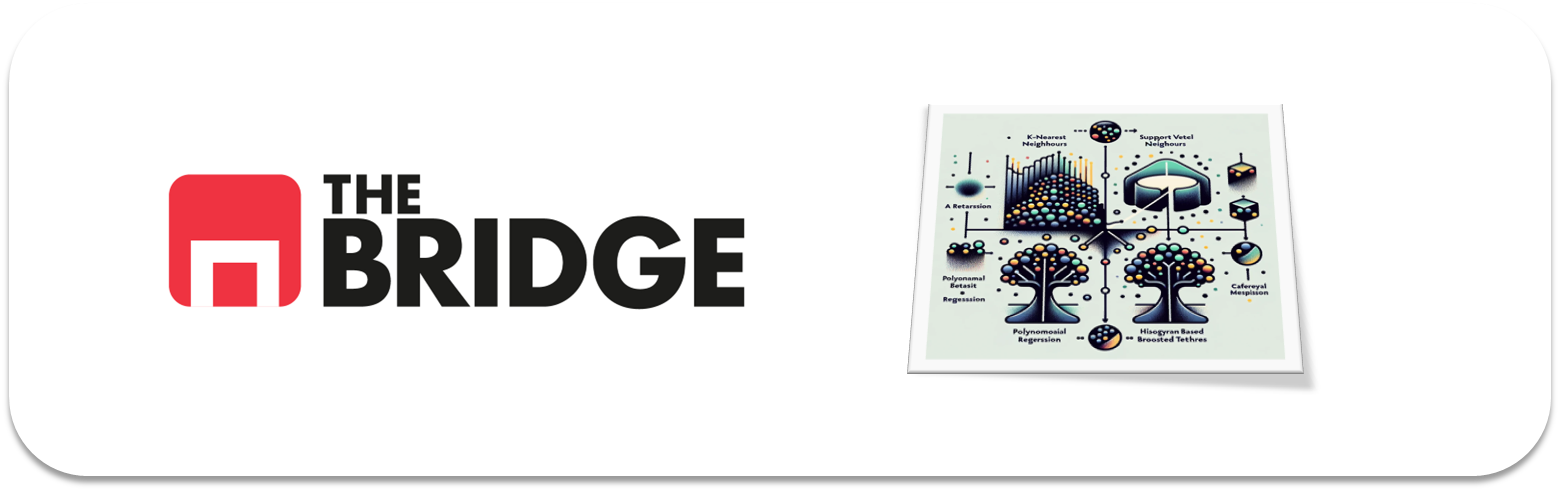

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_absolute_error

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df_vinos=pd.read_csv("./data/wines_dataset.csv",sep="|")
df_vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df_vinos.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
class                     2
dtype: int64

In [5]:
target_clas= "quality"
target_reg= "alcohol"

In [6]:
train_set,test_set=train_test_split(df_vinos,test_size=0.2,random_state=42)
print(train_set.shape)
print(test_set.shape)

(5197, 13)
(1300, 13)


In [7]:
train_set=pd.get_dummies(train_set,columns=["class"],dtype=int)

In [50]:
test_set=pd.get_dummies(test_set,columns=["class"],dtype=int)

In [8]:
features_num=['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
features_cat=['quality','class_red', 'class_white']

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [9]:
train_set_clas=train_set.copy()
train_set_clas.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class_red', 'class_white'],
      dtype='object')

In [10]:
features_num_clas= features_num.copy()
features_cat_clas= ['class_red', 'class_white']

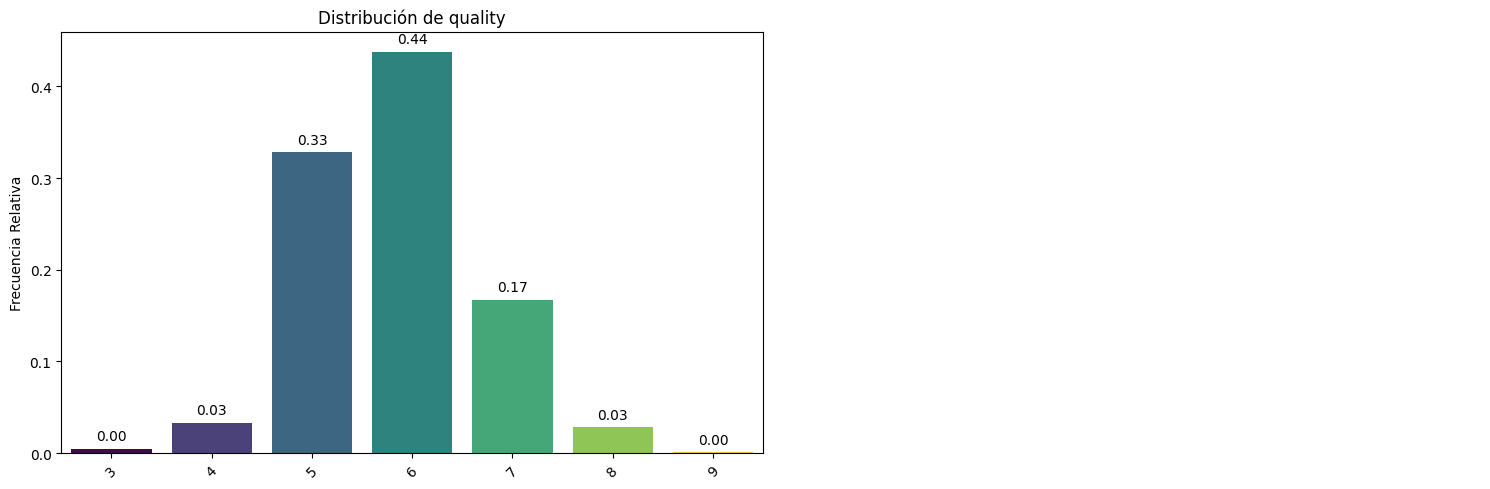

In [11]:
bt.pinta_distribucion_categoricas(train_set_clas,[target_clas],True,True) #Descompensación va a haber que hacer smote o usar argumento class_weights

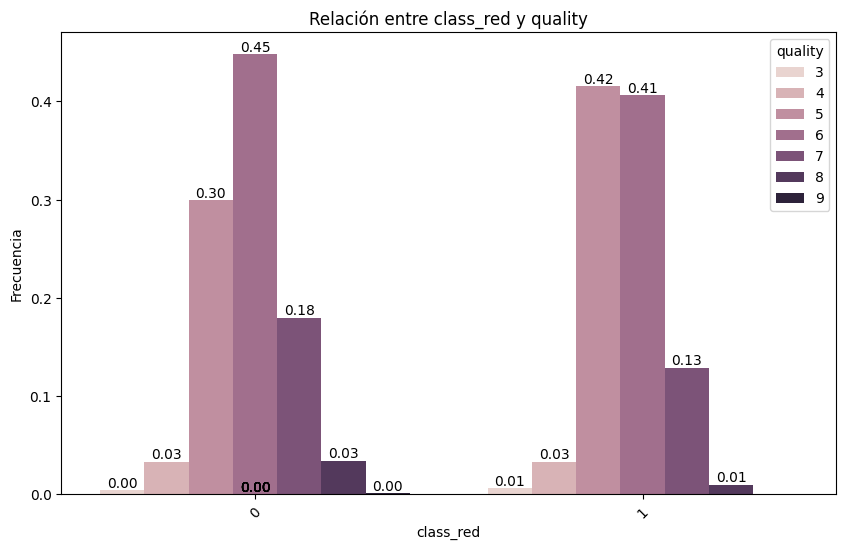

In [12]:
bt.plot_categorical_relationship_fin(train_set_clas, 'class_red', target_clas, show_values= True, relative_freq= True)

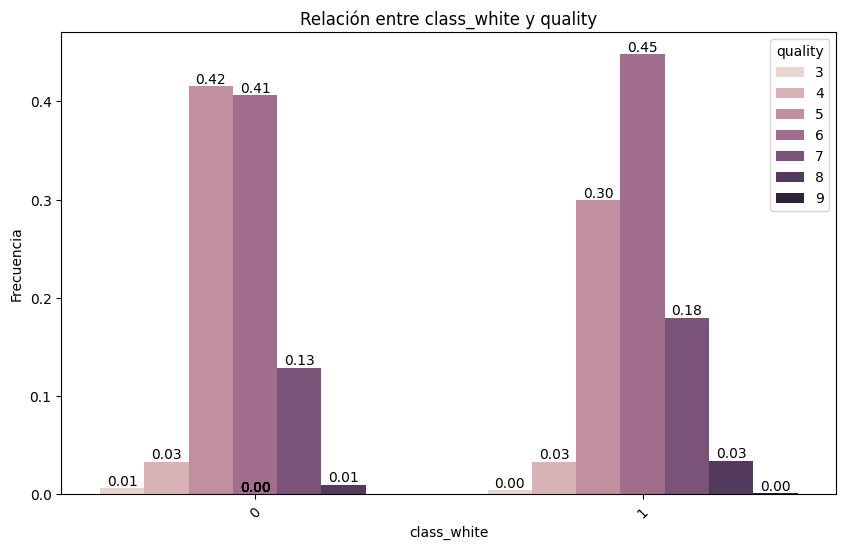

In [13]:
bt.plot_categorical_relationship_fin(train_set_clas, 'class_white', target_clas, show_values= True, relative_freq= True)

In [14]:
valores_target=train_set_clas[target_clas].unique().tolist()

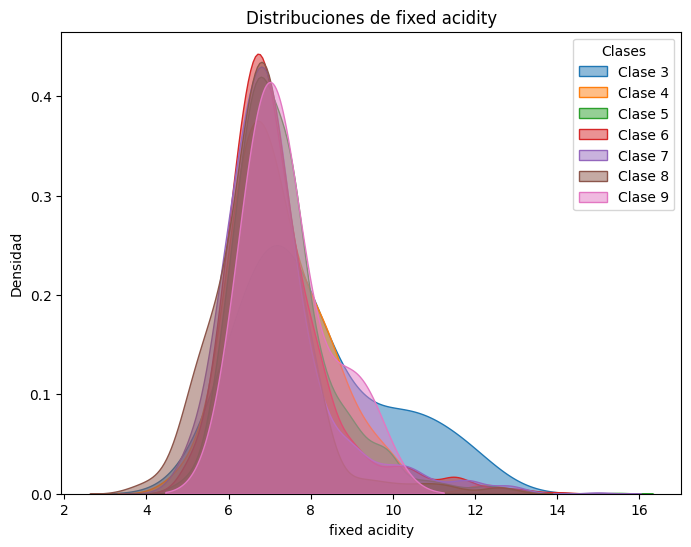

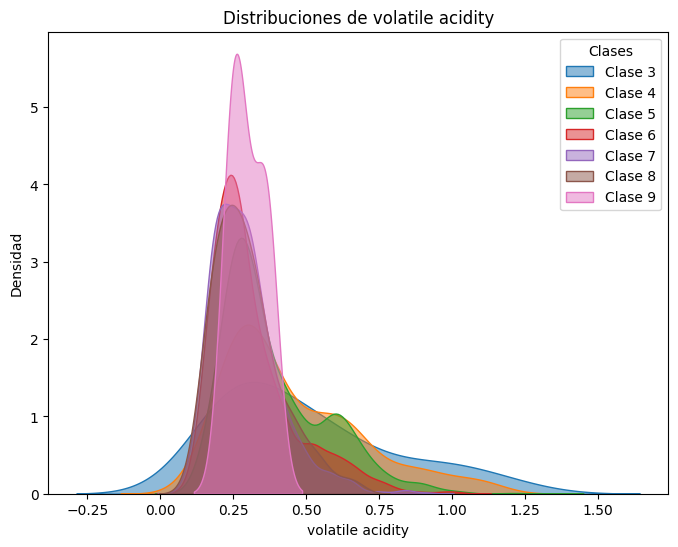

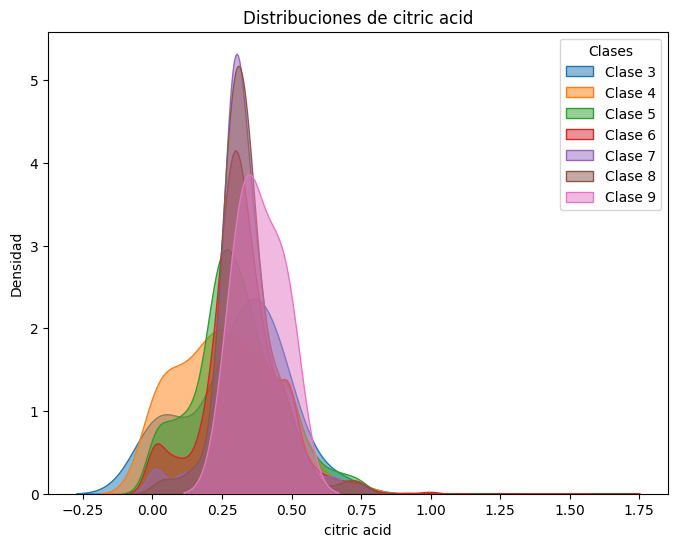

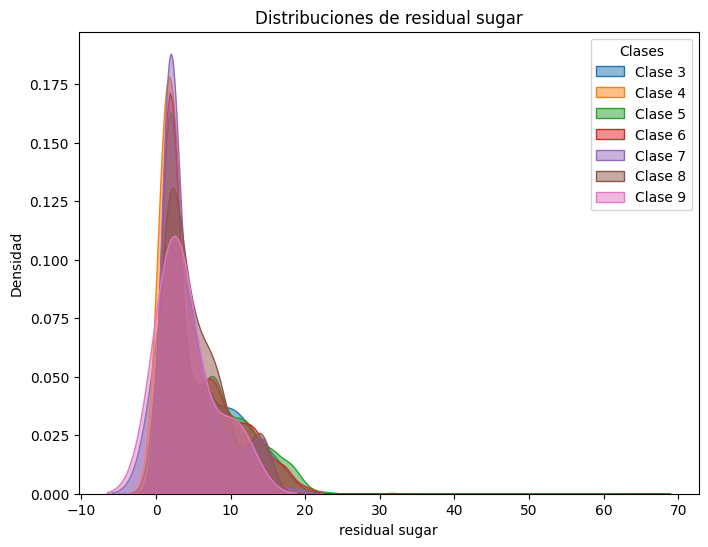

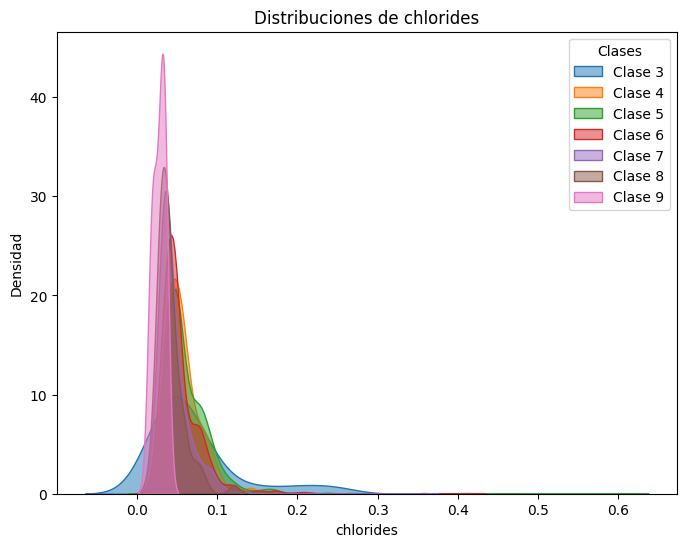

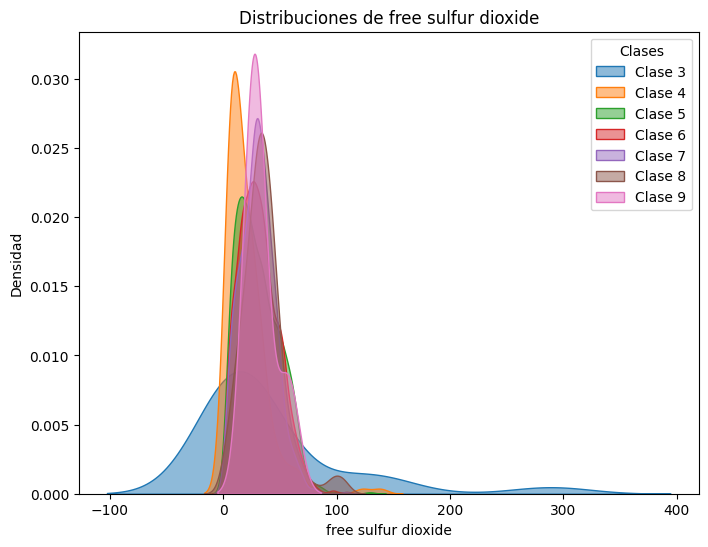

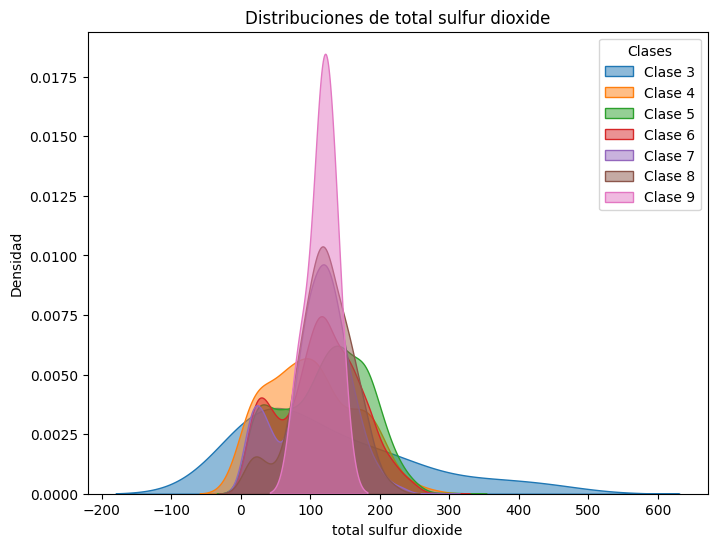

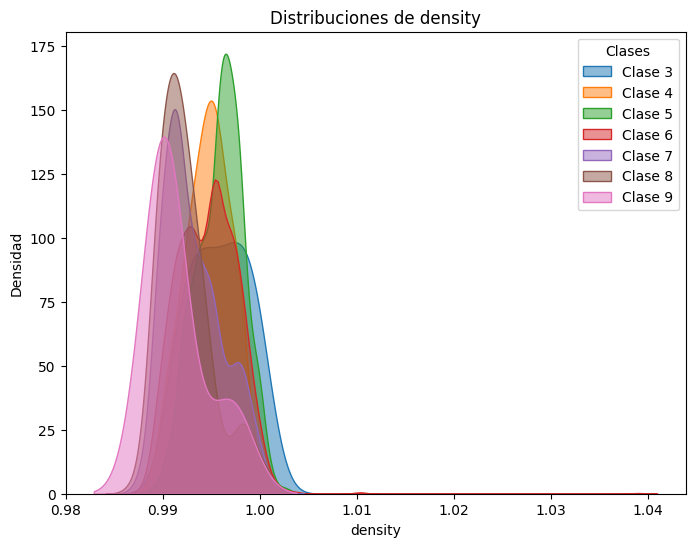

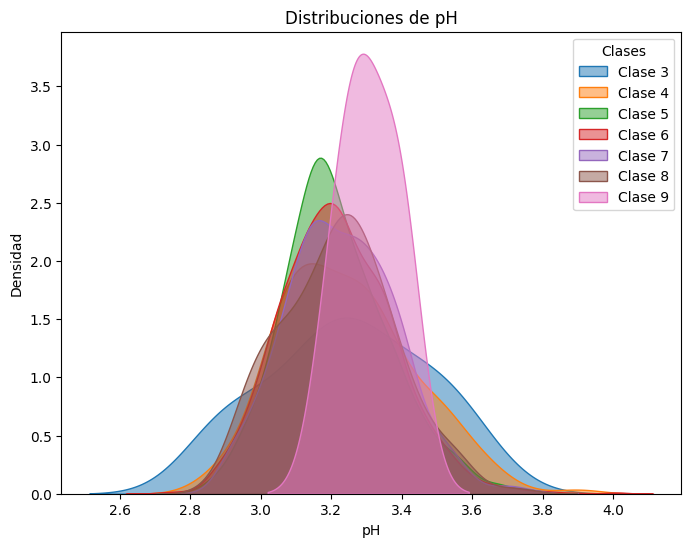

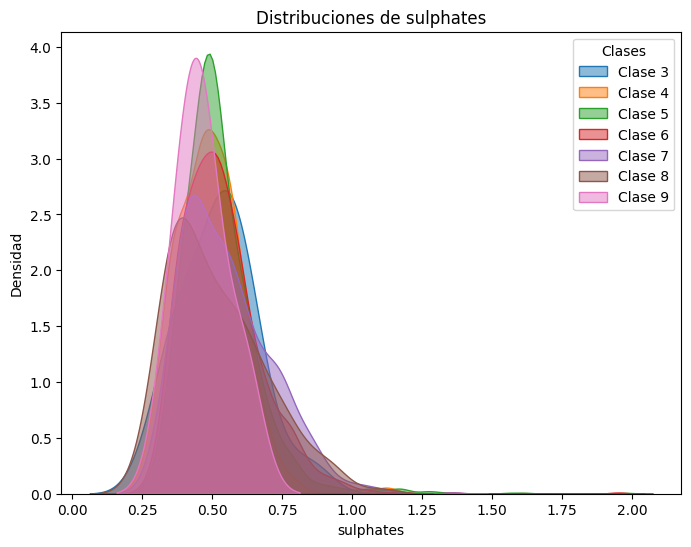

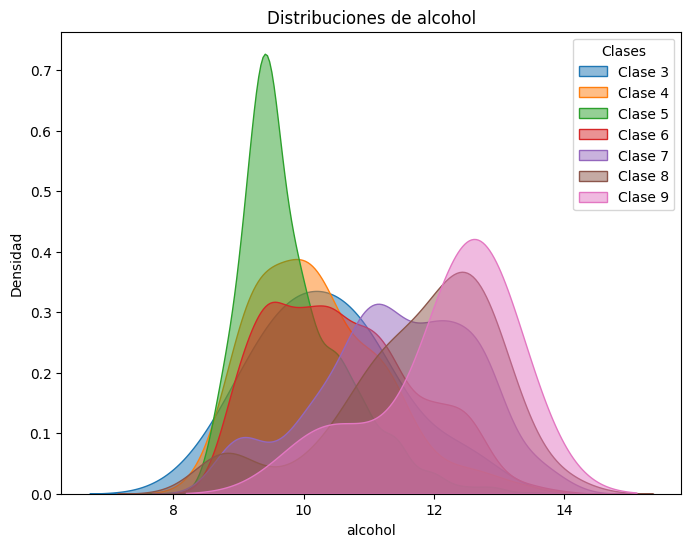

In [15]:
for col in features_num_clas:
    plt.figure(figsize=(8, 6))  
    for i in sorted(valores_target):  
        sns.kdeplot(
            train_set_clas[train_set_clas[target_clas] == i][col],
            fill=True,
            alpha=0.5,
            label=f"Clase {i}" 
        )
    plt.title(f"Distribuciones de {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.legend(title="Clases")
    plt.show()

In [16]:
#No me quitaría ninguna de las numericas puesto que todas tienen aunque sea una minima diferencia de distribucion entre clases de la variable target.
# Las que parece que tienen menos relevancia sobre la calidad del vino son el azucar residual y los sulfatos
# También es interesante valorar como en ciertas categorias la mejor calidad(9) tiene funciones de densidad mucho mas concentradas en valores concretos,
#   a diferencia de los de peor calidad que tienen valores mas dispersos

In [17]:
#Al no haber quitado ninguna voy a trabajar con train_set directamente

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

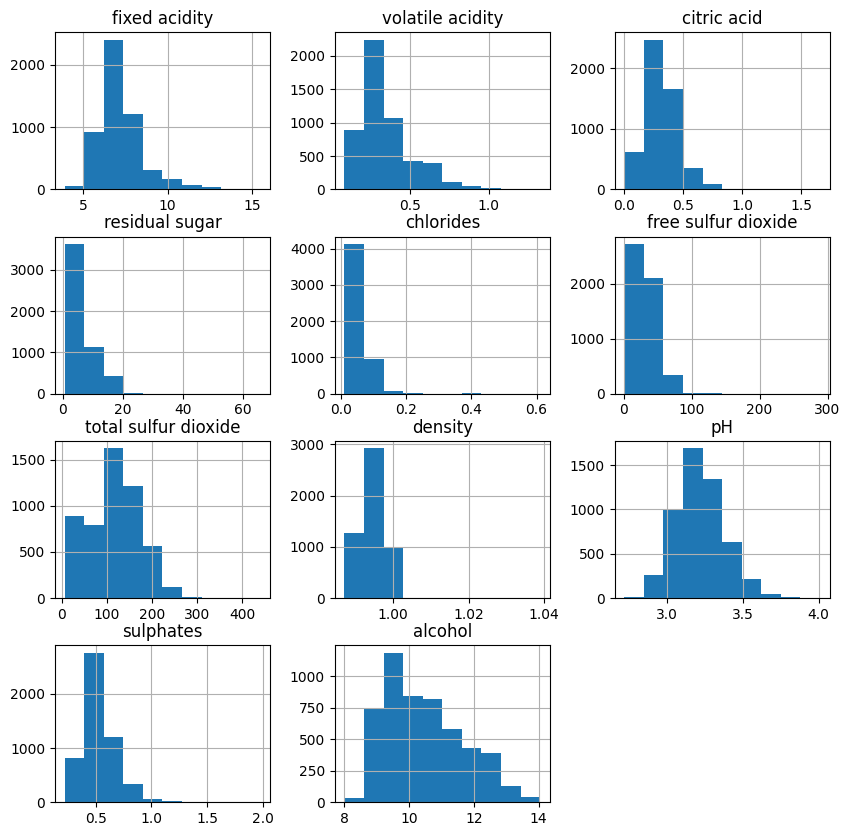

In [18]:
train_set[features_num].hist(figsize=(10,10))

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>],
       [<Axes: title={'center': 'sulphates'}>, <Axes: >, <Axes: >]],
      dtype=object)

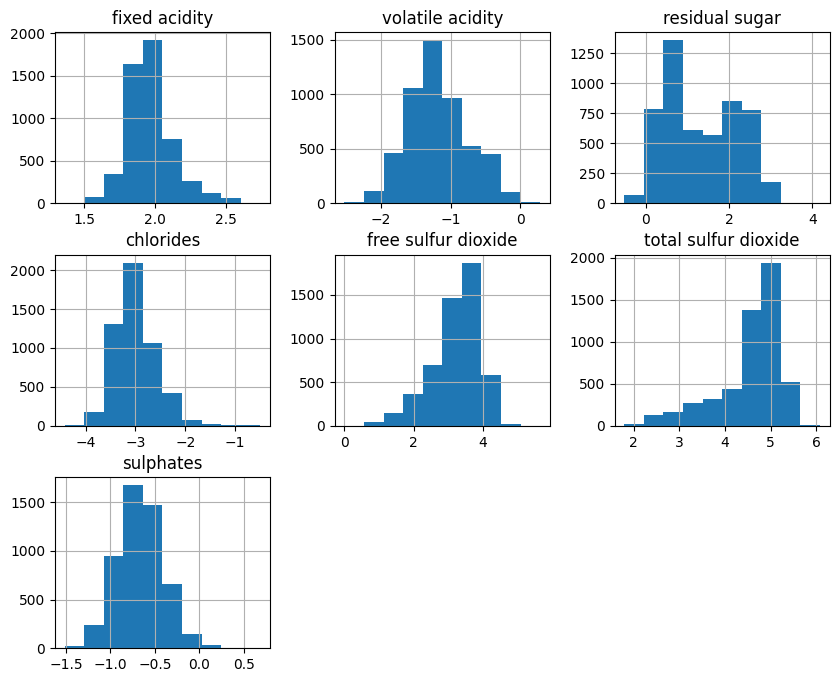

In [19]:
features_log = ["fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "sulphates"]

minimo = train_set[features_log].min().min()
ajuste = abs(minimo) + 1 if minimo <= 0 else 0

# Aplicar transformación logarítmica con el ajuste
for i in features_log:
    train_set[i] = np.log(train_set[i] + ajuste)
    test_set[i] = np.log(test_set[i] + ajuste)

train_set[features_log].hist(figsize=(10, 8))

In [20]:
#Ahora escalo todas las variables numericas creando un nuevo set que usare para entrenar Linear regression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set_scaled= train_set.copy()
test_set_scaled= test_set.copy()
train_set_scaled[features_num] = scaler.fit_transform(train_set[features_num])
test_set_scaled[features_num] = scaler.transform(test_set[features_num])

train_set_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_red,class_white
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5197.000000,5197.000000,5197.000000
mean,-5.605590e-16,-2.214892e-16,-9.297076e-17,2.734434e-18,5.714968e-16,-1.709021e-16,1.668005e-16,5.706764e-14,2.365286e-16,-8.169122e-17,1.346709e-16,5.817587,0.248220,0.751780
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,0.870688,0.432022,0.432022
min,-3.650546e+00,-3.093987e+00,-2.187140e+00,-2.130418e+00,-3.375535e+00,-4.578518e+00,-3.851433e+00,-2.524538e+00,-3.119464e+00,-3.303529e+00,-2.085824e+00,3.000000,0.000000,0.000000
25%,-6.406275e-01,-6.678919e-01,-4.743893e-01,-8.590345e-01,-6.595501e-01,-5.432713e-01,-3.193079e-01,-7.815705e-01,-6.821081e-01,-6.902881e-01,-8.295250e-01,5.000000,0.000000,1.000000
50%,-9.608146e-02,-1.353685e-01,-6.332925e-02,-2.678746e-01,-1.587052e-01,2.174037e-01,2.927357e-01,6.169387e-02,-5.714499e-02,-2.494373e-02,-1.594991e-01,6.000000,0.000000,1.000000
75%,4.830897e-01,6.034131e-01,5.532609e-01,8.815795e-01,6.052801e-01,7.105928e-01,6.811085e-01,7.588809e-01,6.303145e-01,6.087895e-01,6.780332e-01,6.000000,0.000000,1.000000
max,4.734467e+00,3.363578e+00,9.185522e+00,3.305764e+00,5.884922e+00,3.491975e+00,2.123631e+00,1.469598e+01,4.942560e+00,5.264422e+00,2.981247e+00,9.000000,1.000000,1.000000


In [61]:
X_train_clas= train_set.drop(columns=target_clas)
y_train_clas= train_set[target_clas]
X_test_clas= test_set.drop(columns=target_clas)
y_test_clas= test_set[target_clas]

In [62]:
X_train_clas_scaled = train_set_scaled.drop(columns=target_clas)
X_test_clas_scaled = test_set_scaled.drop(columns=target_clas)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

modelos = {
    "Logistic Regression": (LogisticRegression(max_iter=100,class_weight="balanced", random_state=42), X_train_clas_scaled),
    "Random Forest": (RandomForestClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42), X_train_clas),
    "KNN (K=5)": (KNeighborsClassifier(n_neighbors=5, weights="distance"), X_train_clas_scaled),
    "KNN (K=10)": (KNeighborsClassifier(n_neighbors=10, weights="distance"), X_train_clas_scaled),
    "LightGBM": (LGBMClassifier(n_estimators=100, max_depth=5, class_weight="balanced", verbose=-1, random_state=42), X_train_clas),
    "CatBoost": (CatBoostClassifier(depth=5, iterations=100, auto_class_weights="Balanced", verbose=0, random_seed=42), X_train_clas)
}


In [24]:
metricas_cv = {}
valores = []
for name, (model, X_train) in modelos.items():
    print(f"{name}")
    metricas_cv[name] = cross_val_score(model, X_train, y_train_clas, cv=5, scoring="recall_macro")
    valores.append(np.mean(metricas_cv[name]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

Logistic Regression


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest
KNN (K=5)
KNN (K=10)
LightGBM


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `skl

CatBoost


In [25]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, recall_macro_scores: {valores} ----- recall_macro_mean: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, recall_macro_scores: [0.28295367 0.35119353 0.39950776 0.4072953  0.45184355] ----- recall_macro_mean: 0.3785587629696258
Model <Random Forest>, recall_macro_scores: [0.27557884 0.3094813  0.31475601 0.30662802 0.31178988] ----- recall_macro_mean: 0.30364681109387687
Model <KNN (K=5)>, recall_macro_scores: [0.37327765 0.32377652 0.34792487 0.31932841 0.33865038] ----- recall_macro_mean: 0.3405915658805251
Model <KNN (K=10)>, recall_macro_scores: [0.35237387 0.31414529 0.33801723 0.31207976 0.34924619] ----- recall_macro_mean: 0.3331724685466053
Model <LightGBM>, recall_macro_scores: [0.35594767 0.34224808 0.36614682 0.3550211  0.3665545 ] ----- recall_macro_mean: 0.35718363240903034
Model <CatBoost>, recall_macro_scores: [0.35282912 0.32927246 0.36327014 0.3565966  0.38144821] ----- recall_macro_mean: 0.35668330584997376
El ganador es Logistic Regression


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()


param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],  
    "C": [1.0, 0.1, 0.01, 0.001, 10, 100],  
    "solver": ["lbfgs", "liblinear", "saga", "newton-cg"],  
    "max_iter": [100, 200, 300],  
    "class_weight": [None, "balanced"],  
    "l1_ratio": [None, 0.1, 0.5, 0.9],  
}


grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="recall_macro", 
    cv=5,  
    verbose=False,
    n_jobs=-1  
)


grid_search.fit(X_train_clas_scaled, y_train_clas)

c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4500 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [None, 0.1, 0.5, 0.9],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg']},
             scoring='recall_macro', verbose=False)

In [66]:
# Mostrar los mejores parámetros y resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor recall_macro:", grid_search.best_score_)

Mejores parámetros: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor recall_macro: 0.40429330325127477


In [67]:
lr_optimo= grid_search.best_estimator_
lr_opt_predict=lr_optimo.predict(X_test_clas_scaled)
print(classification_report(y_test_clas,lr_opt_predict))

              precision    recall  f1-score   support

           3       0.02      0.50      0.04         6
           4       0.11      0.33      0.16        43
           5       0.58      0.48      0.52       432
           6       0.60      0.25      0.35       562
           7       0.30      0.27      0.28       210
           8       0.10      0.43      0.16        47
           9       0.00      0.00      0.00         0

    accuracy                           0.34      1300
   macro avg       0.24      0.32      0.22      1300
weighted avg       0.51      0.34      0.38      1300



c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

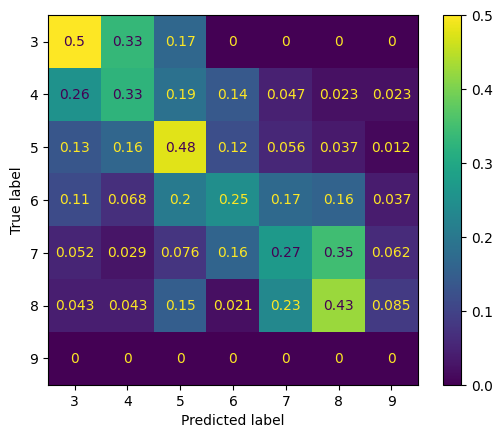

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test_clas,lr_opt_predict,normalize='true')

In [30]:
#La clasificacion del modelo optimo sigue siendo pesima, aunque es verdad que se equivoca dando valoraciones cercanas a la real
#Podría probar a entrenarlo igualando las clases con smote y haciendo el cross validation con los modelos ya optimizados.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

<Axes: xlabel='alcohol', ylabel='Count'>

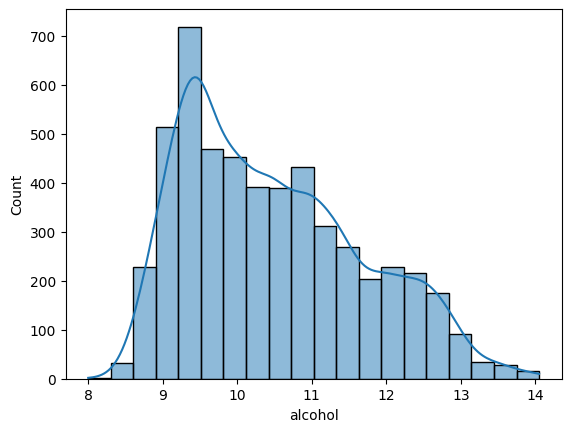

In [31]:
sns.histplot(train_set[target_reg],kde=True,bins=20)

In [32]:
correlaciones=train_set.corr()
correlaciones

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_red,class_white
fixed acidity,1.000000,0.215993,0.315269,-0.083432,0.372393,-0.342159,-0.383180,0.459498,-0.269812,0.274827,-0.111522,-0.082229,0.474772,-0.474772
volatile acidity,0.215993,1.000000,-0.341738,-0.119678,0.430457,-0.375410,-0.435183,0.266932,0.230580,0.239285,-0.020770,-0.250433,0.627103,-0.627103
citric acid,0.315269,-0.341738,1.000000,0.119344,-0.031489,0.105411,0.172385,0.091340,-0.331794,0.028262,-0.005690,0.096020,-0.189034,0.189034
residual sugar,-0.083432,-0.119678,0.119344,1.000000,-0.106979,0.389690,0.415140,0.509033,-0.244310,-0.169255,-0.309084,-0.016315,-0.321451,0.321451
chlorides,0.372393,0.430457,-0.031489,-0.106979,1.000000,-0.291935,-0.398116,0.515066,0.136764,0.385009,-0.369663,-0.264120,0.639930,-0.639930
free sulfur dioxide,-0.342159,-0.375410,0.105411,0.389690,-0.291935,1.000000,0.786764,-0.049344,-0.149894,-0.226640,-0.148186,0.097296,-0.548692,0.548692
total sulfur dioxide,-0.383180,-0.435183,0.172385,0.415140,-0.398116,0.786764,1.000000,-0.101665,-0.254473,-0.327432,-0.189356,0.000851,-0.770371,0.770371
density,0.459498,0.266932,0.091340,0.509033,0.515066,-0.049344,-0.101665,1.000000,0.018402,0.279289,-0.682345,-0.305107,0.384596,-0.384596
pH,-0.269812,0.230580,-0.331794,-0.244310,0.136764,-0.149894,-0.254473,0.018402,1.000000,0.241572,0.116497,0.011918,0.338300,-0.338300
sulphates,0.274827,0.239285,0.028262,-0.169255,0.385009,-0.226640,-0.327432,0.279289,0.241572,1.000000,-0.022053,0.038375,0.497961,-0.497961


<Axes: >

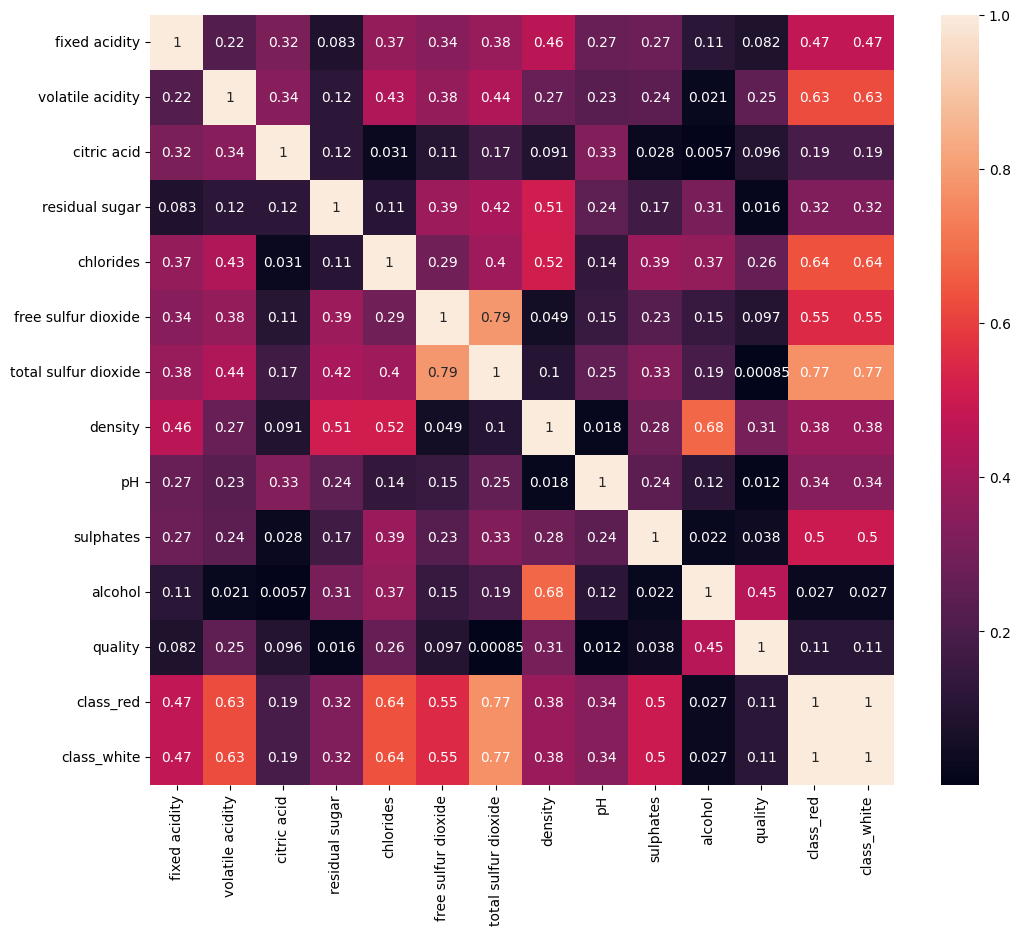

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(np.abs(correlaciones),annot=True)

In [34]:
features_cat

['quality', 'class_red', 'class_white']

In [35]:
insuficientemente_correladas=[]
for i in features_num:
    if np.abs(train_set[i].corr(train_set[target_reg]))<0.05:
        print(f"{i}: {train_set[i].corr(train_set[target_reg])}")
        insuficientemente_correladas.append(i)

volatile acidity: -0.020769874708267955
citric acid: -0.005690209322325269
sulphates: -0.02205263245258407


In [36]:
correlaciones_sin_target=train_set.drop(columns=[target_reg,'quality', 'class_red', 'class_white']).corr()

pares_correlados = []

for i in range(len(correlaciones_sin_target.columns)):
    for j in range(i + 1, len(correlaciones_sin_target.columns)):  
        if abs(correlaciones_sin_target.iloc[i, j]) > 0.85:  
            pares_correlados.append((
                correlaciones_sin_target.columns[i],  
                correlaciones_sin_target.columns[j],  
                correlaciones_sin_target.iloc[i, j]   
            ))
pd.DataFrame(pares_correlados, columns=["Columna 1", "Columna 2", "Correlación"])

,Columna 1,Columna 2,Correlación


In [37]:
train_set_reg= train_set.drop(columns=insuficientemente_correladas)
train_set_reg_scaled= train_set_scaled.drop(columns=insuficientemente_correladas)

In [51]:
test_set_reg= test_set.drop(columns=insuficientemente_correladas)
test_set_reg_scaled= test_set_scaled.drop(columns=insuficientemente_correladas)

In [52]:
X_train_reg = train_set_reg.drop(columns=["alcohol"])  
y_train_reg = train_set_reg["alcohol"]
X_test_reg = test_set_reg.drop(columns=["alcohol"])
y_test_reg = test_set_reg["alcohol"]


X_train_reg_scaled = train_set_reg_scaled.drop(columns=["alcohol"])
X_test_reg_scaled = test_set_reg_scaled.drop(columns=["alcohol"])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

modelos_regresion = {
    "Linear Regression": {"model": (LinearRegression(), X_train_reg_scaled)},
    "Random Forest": {"model":( RandomForestRegressor(random_state=42), X_train_reg)},
    "LightGBM Regressor": {"model": (LGBMRegressor(random_state=42), X_train_reg)},
    "CatBoost Regressor": {"model": (CatBoostRegressor(random_state=42, verbose=0), X_train_reg)}
}


In [41]:
metricas_cv_reg = {}
valores_promedio = []

for nombre, params in modelos_regresion.items():
    modelo, X_train = params["model"]  
    
    
    scores = cross_val_score(modelo, X_train, y_train_reg, cv=5, scoring="neg_mean_absolute_error")
    
    metricas_cv_reg[nombre] = scores
    valores_promedio.append(-np.mean(scores))  


ganador_reg = list(metricas_cv_reg.keys())[np.argmin(valores_promedio)]


for nombre, valores in metricas_cv_reg.items():
    print(f"Modelo <{nombre}>, Error Absoluto Medio: {-np.mean(valores)}")
print(f"El ganador es {ganador_reg}")


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklea

Modelo <Linear Regression>, Error Absoluto Medio: 0.4327081236281199
Modelo <Random Forest>, Error Absoluto Medio: 0.28995512582895955
Modelo <LightGBM Regressor>, Error Absoluto Medio: 0.3024483867646229
Modelo <CatBoost Regressor>, Error Absoluto Medio: 0.2828099233642772
El ganador es CatBoost Regressor


In [42]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

catboost_reg = CatBoostRegressor(random_state=42, verbose=0)

param_grid_reg = {
    "depth": [6, 8, 10],
    "learning_rate": [0.01, 0.1, 0.3],
    "iterations": [200, 500, 1000],
    "l2_leaf_reg": [3, 5, 7],
    "bagging_temperature": [0, 0.2, 0.5, 1],
    "random_strength": [0.5, 1, 2],
}

grid_search_reg = GridSearchCV(
    estimator=catboost_reg,
    param_grid=param_grid_reg,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=3,
    n_jobs=-1,
)

grid_search_reg.fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000012633E26250>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0, 0.2, 0.5, 1],
                         'depth': [6, 8, 10], 'iterations': [200, 500, 1000],
                         'l2_leaf_reg': [3, 5, 7],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'random_strength': [0.5, 1, 2]},
             scoring='neg_mean_absolute_error', verbose=3)

In [43]:
print(f"Mejores hiperparámetros: {grid_search_reg.best_params_}")
print(f"Mejor puntuación: {-grid_search_reg.best_score_}")

Mejores hiperparámetros: {'bagging_temperature': 0, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'random_strength': 2}
Mejor puntuación: 0.24720855434261382


In [54]:
cat_optimizado= grid_search_reg.best_estimator_
cat_opt_predict=cat_optimizado.predict(X_test_reg)
mean_absolute_error(y_test_reg,cat_opt_predict)

0.23330391763019598

In [55]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

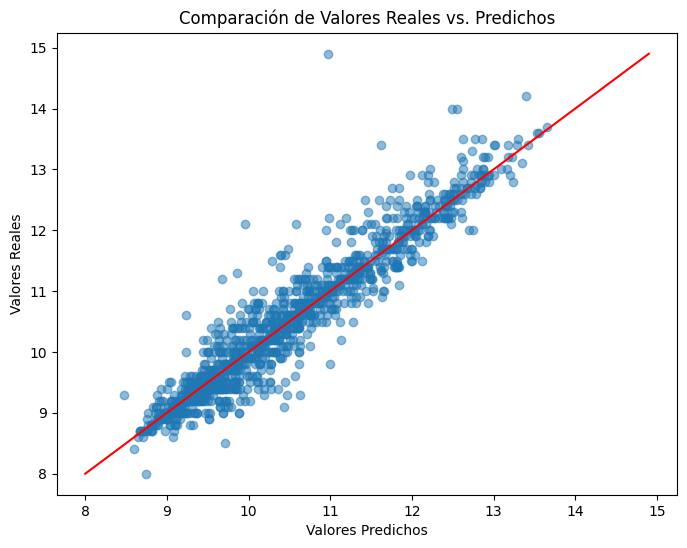

In [56]:
plot_predictions_vs_actual(y_test_reg,cat_opt_predict)